In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

11501568/11490434 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


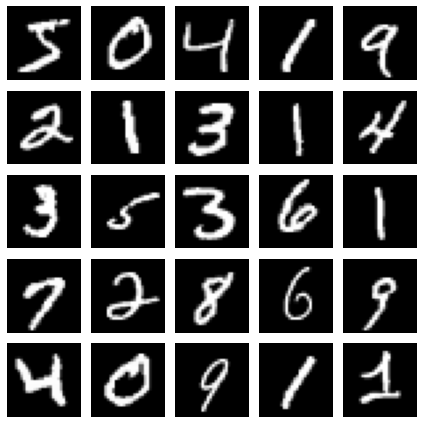

In [3]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')  

plt.tight_layout()
plt.show()

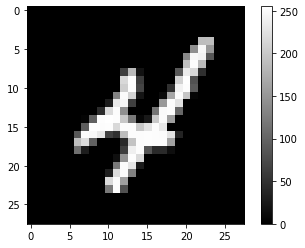

In [4]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

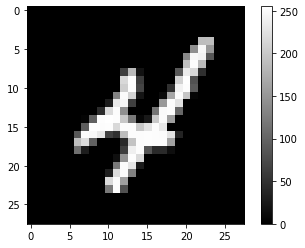

In [6]:
plt.imshow(x_train[9].reshape(28,28), cmap='gray') 
plt.colorbar()   
plt.show()

In [7]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [11]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [12]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 7s 3ms/step - loss: 1.4136 - accuracy: 0.6654 - val_loss: 0.7627 - val_accuracy: 0.8248
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6221 - accuracy: 0.8454 - val_loss: 0.4867 - val_accuracy: 0.8796
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4615 - accuracy: 0.8783 - val_loss: 0.3966 - val_accuracy: 0.8965
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3969 - accuracy: 0.8912 - val_loss: 0.3557 - val_accuracy: 0.9015
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3630 - accuracy: 0.8992 - val_loss: 0.3291 - val_accuracy: 0.9081
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3416 - accuracy: 0.9040 - val_loss: 0.3128 - val_accuracy: 0.9118
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3263 - accuracy: 0.9075 - val_loss: 0.3028 - val_accuracy:

In [15]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2027 - accuracy: 0.9402


[0.20272786915302277, 0.9401999711990356]

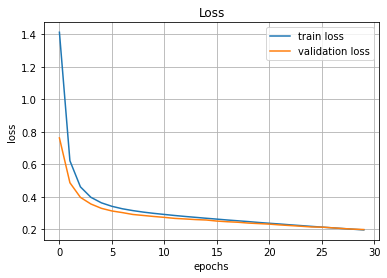

In [16]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

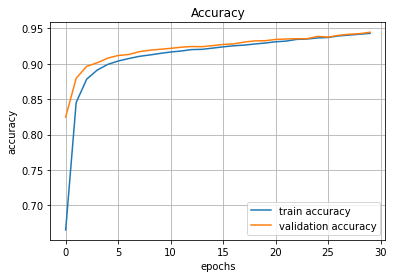

In [17]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [18]:
pred = model.predict(x_test)

print(pred.shape)

print(pred[:5])   # 모델이 예측한 pred[:5] 필기체 손글씨 숫자와 정답을 비교하시오

(10000, 10)
[[6.7767782e-05 2.8370928e-09 4.5851246e-04 5.2106748e-03 9.9455457e-09
  3.4672459e-05 3.3578604e-12 9.9342489e-01 1.1733395e-05 7.9169468e-04]
 [2.0164090e-04 1.5670843e-05 9.9758971e-01 1.4690247e-03 3.0529916e-13
  1.8791771e-04 4.9778592e-04 2.1766042e-13 3.8283459e-05 1.3669933e-12]
 [6.0273087e-06 9.8015606e-01 1.1278434e-02 1.4459688e-03 1.2289280e-04
  4.7203482e-04 1.4942671e-03 1.6660640e-03 3.2085464e-03 1.4971386e-04]
 [9.9904615e-01 7.0294270e-11 4.1754785e-04 4.6083169e-06 3.2359832e-08
  3.1335195e-04 1.5200747e-04 1.0429596e-05 9.5259429e-06 4.6324218e-05]
 [1.3852229e-04 7.8464893e-08 1.3543279e-03 2.0342448e-05 9.8450607e-01
  3.0838975e-04 2.1322514e-03 5.6805182e-04 1.3374635e-03 9.6345153e-03]]


# numpy.random.choice() 함수를 이용해서 x_test 에서 임의로 서로 다른 5개의 데이터를 추출해서 model.predict() 실행하시오

In [22]:
import numpy as np

random_index_list = np.random.choice(len(x_test), 5, False)

print(random_index_list)

[7349 5031 7540 2569 7541]


In [23]:
random_x_test_list = []

for index in random_index_list:

    random_x_test_list.append(x_test[index])

random_x_test_array = np.array(random_x_test_list)

print(random_x_test_array.shape)

(5, 28, 28)


In [30]:
random_pred = model.predict(random_x_test_array)

print(random_pred.shape)

print(np.argmax(random_pred, axis=1), np.argmax(t_test[random_index_list], axis=1))

(5, 10)
[2 0 6 5 5] [2 0 6 5 5]
